In [30]:
from pathlib import Path
import pandas as pd

interim = Path('../data/interim')
game_logs = pd.read_pickle(Path(interim) / 'game_logs.pkl')
panel = pd.read_pickle(Path(interim) / 'panel.pkl')

In [31]:
rest = panel[['GAME_ID', 'BAT_ID', 'Date']].sort_values(['BAT_ID', 'Date'])
rest['L_Date'] = rest.groupby(['BAT_ID'])['Date'].shift(1)
rest['rest'] = rest['Date'] - rest['L_Date']
rest['rest'] = rest['rest'].astype('timedelta64[D]')
rest.loc[rest['rest'] >= 10, 'rest'] = 10
rest = rest[['GAME_ID', 'BAT_ID', 'rest']]
rest = rest.set_index(['GAME_ID', 'BAT_ID'])
rest

rest
GAME_ID      BAT_ID        
CIN195404130 aaroh101   NaN
MLN195404150 aaroh101   2.0
MLN195404170 aaroh101   2.0
MLN195404181 aaroh101   1.0
MLN195404182 aaroh101   0.0
...                     ...
CHA197907122 NaN        NaN
             NaN        NaN
             NaN        NaN
             NaN        NaN
             NaN        NaN

[3178224 rows x 1 columns]

<AxesSubplot:>

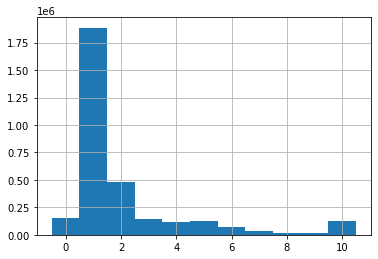

In [32]:
rest['rest'].hist(bins=11, range=(-0.5, 10.5))

In [33]:
rest['rest'].describe()

count    3.166454e+06
mean     2.063103e+00
std      2.211948e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.000000e+01
Name: rest, dtype: float64